In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import pickle

import re

import nltk
nltk.download('stopwords') 

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package stopwords to C:\Users\Mayank
[nltk_data]     Aman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
spam = pd.read_csv(r"C:\Users\Mayank Aman\Desktop\SC Pbl\spam.csv", encoding="ISO-8859-1")


In [3]:
spam.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
spam.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
spam.tail()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
spam.shape


(5572, 2)

In [8]:
spam.groupby('label').size()


label
ham     4825
spam     747
dtype: int64

<Axes: xlabel='label'>

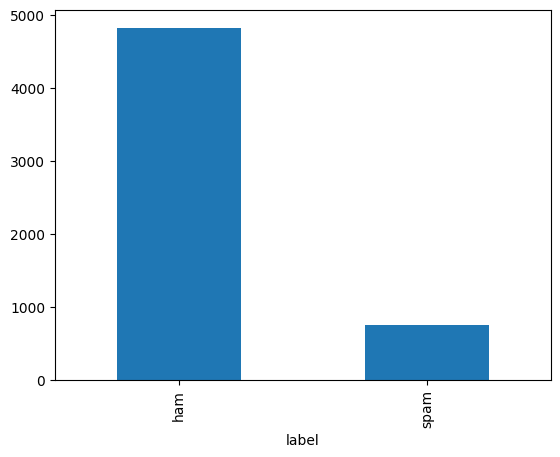

In [9]:
spam['label'].value_counts().plot(kind='bar')


In [10]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

In [11]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

In [13]:
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

model3 = MultinomialNB()
model3.fit(X_train, Y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [14]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

In [15]:
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("--------------------------------")

print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")

print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

Random Forest Classifier
Confusion Matrix: 
[[964   1]
 [ 25 125]]
Accuracy:  0.9766816143497757
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[953  12]
 [ 23 127]]
Accuracy:  0.968609865470852
--------------------------------
Multinomial Naïve Bayes
Confusion Matrix: 
[[952  13]
 [  9 141]]
Accuracy:  0.9802690582959641


<Axes: >

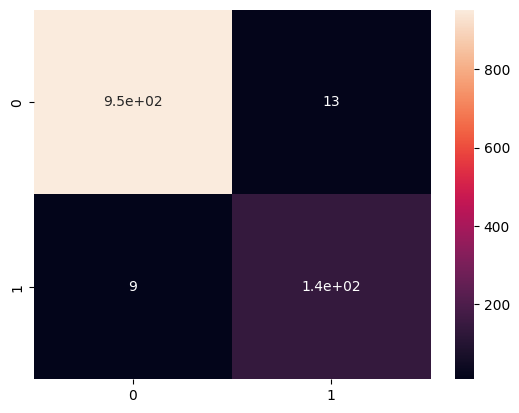

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [17]:
from sklearn.metrics import classification_report

report1 = classification_report(Y_test, pred1)
print("Classification Report for RFC \n", report1)
report2 = classification_report(Y_test, pred2)
print("Classification Report for DTC \n", report2)
report3 = classification_report(Y_test, pred3)
print("Classification Report for MNB \n", report3)

Classification Report for RFC 
               precision    recall  f1-score   support

       False       0.97      1.00      0.99       965
        True       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Classification Report for DTC 
               precision    recall  f1-score   support

       False       0.98      0.99      0.98       965
        True       0.91      0.85      0.88       150

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report for MNB 
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       965
        True       0.92      0.94      0.93       150

    accuracy                           0.98      1115
   macro avg       0.95      0.9

In [18]:
filename = "RFC.pkl"
pickle.dump(model1, open(filename, 'wb'))
filename = "DTC.pkl"
pickle.dump(model2, open(filename, 'wb'))
filename = "MNB.pkl"
pickle.dump(model3, open(filename, 'wb'))
print("Saved all Models")

Saved all Models


In [19]:
with open("RFC_d2.pkl", "wb") as f:      
    pickle.dump(model1, f)
with open("DTC_d2.pkl", "wb") as f:      
    pickle.dump(model2, f)
with open("MNB_d2.pkl", "wb") as f:      
    pickle.dump(model3, f)
print("Saved all Models for Dataset 2")

with open("vectorizer_d2.pkl", "wb") as f: 
    pickle.dump(cv, f)
print("Vectorizer for Dataset 2 saved successfully!")

Saved all Models for Dataset 2
Vectorizer for Dataset 2 saved successfully!


In [20]:
import pickle

filename = "vectorizer.pkl"
pickle.dump(cv, open(filename, 'wb'))

print("Vectorizer saved successfully!")

Vectorizer saved successfully!
